<a href="https://colab.research.google.com/github/chiku27/Machine_Learning-Data_Science/blob/master/Weather_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analysis of Weather Data of Finland and Testing Hypothesis




In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
df_1=pd.read_csv("/content/drive/My Drive/weatherHistory.csv")
df_1.head(5)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.


In [ ]:
df_1.shape

(96453, 11)

In [ ]:
df_2=df_1.drop(['Daily Summary','Summary','Precip Type'],axis=1)
df_2.head(3)

,Formatted Date,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,2006-04-01 00:00:00.000 +0200,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13
1,2006-04-01 01:00:00.000 +0200,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63
2,2006-04-01 02:00:00.000 +0200,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94


In [ ]:
df_2['Formatted Date']=pd.to_datetime(df_2['Formatted Date'],utc=True)
df_2.dtypes

Formatted Date              datetime64[ns, UTC]
Temperature (C)                         float64
Apparent Temperature (C)                float64
Humidity                                float64
Wind Speed (km/h)                       float64
Wind Bearing (degrees)                    int64
Visibility (km)                         float64
Pressure (millibars)                    float64
dtype: object

In [ ]:
df_2=df_2.set_index('Formatted Date')
df_2.head(2)

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
Formatted Date,,,,,,,
2006-03-31 22:00:00+00:00,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13
2006-03-31 23:00:00+00:00,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63


In [ ]:
df=df_2.resample('M').mean()
df.head(2)

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
Formatted Date,,,,,,,
2005-12-31 00:00:00+00:00,0.577778,-4.050000,0.89000,17.114300,140.000000,9.982000,1016.66000
2006-01-31 00:00:00+00:00,-1.677942,-4.173708,0.83461,8.894211,161.018817,7.894064,1021.20496


Hypothesis to be tested Has the Apparent temperature and humidity compared monthly across 10 years of the data indicate an increase due to Global warming

Ho:Null Hypothesis(The apparent temperature and humidity increased monthly across 10 years)

Ha:Alternate Hypothesis(The apparent temperature and humidity has not increased monthly across 10 years)

To test the hypothesis i wil use the month of April as given in the problem statement

In [ ]:
y=lambda x:x.month
x=map(y,df.index)
if x==4:
  df_april=df[x]
df_april.head()


,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
Formatted Date,,,,,,,
2006-04-30 00:00:00+00:00,12.635031,12.098827,0.728625,10.930670,191.877778,10.626760,1013.493694
2007-04-30 00:00:00+00:00,12.348071,11.894421,0.536361,9.917891,182.452778,11.969210,1009.733667
2008-04-30 00:00:00+00:00,11.804622,11.183688,0.693194,11.648372,192.825000,11.099631,1003.999611
2009-04-30 00:00:00+00:00,14.559159,14.267076,0.567847,11.419797,136.629167,11.576146,1011.643556
2010-04-30 00:00:00+00:00,12.194329,11.639406,0.706875,11.148423,181.491667,10.445412,1016.390028


In [ ]:
df_april.shape

(11, 7)

Since we have to check for two continuos variables so we have to apply two sample t-test

In [ ]:
import scipy.stats as stats
ttest,p_value=stats.ttest_ind(a=df_april['Apparent Temperature (C)'],b=df['Humidity'],equal_var=False)
p_value

2.6835333102390366e-12

Since p_value is less than significance level(0.05) we accept the null hypothesis that is the apparent temprature and humidity has increased monthly across 10 years.

Visulization Plots to give Evidence to our testing

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


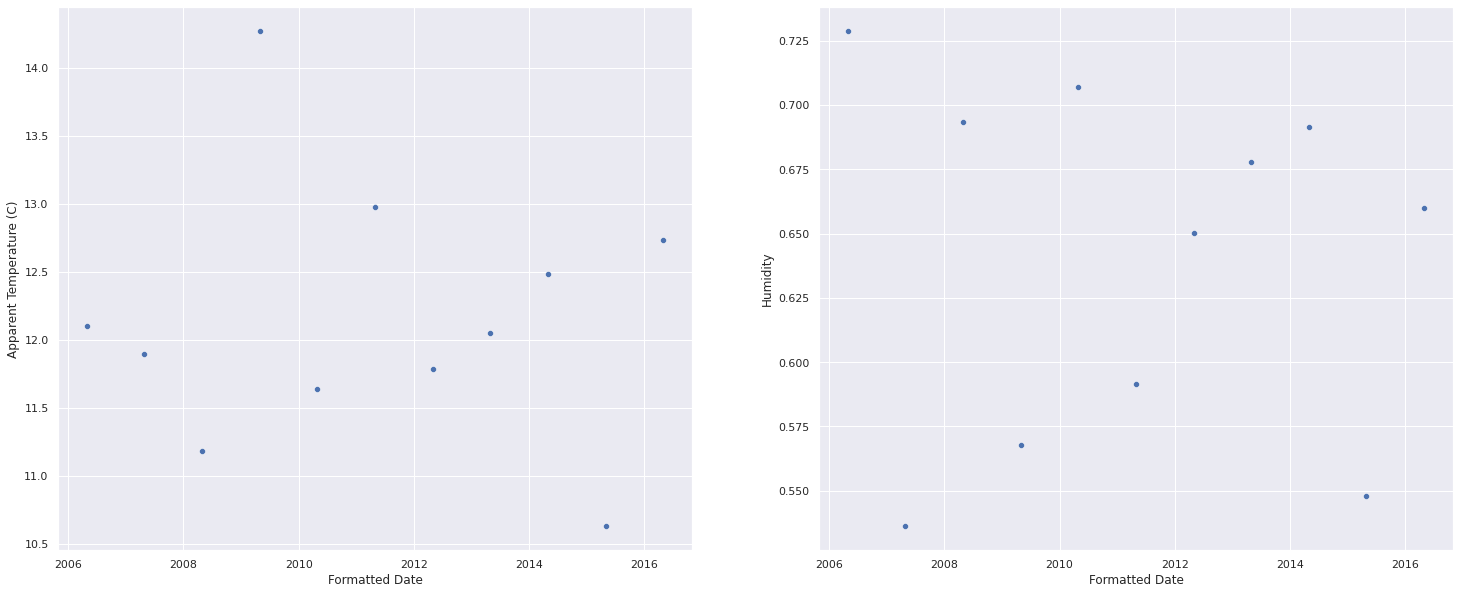

In [ ]:
sns.set_theme(style="darkgrid")
fig,axes=plt.subplots(1,2,squeeze=False,figsize=(25,10))
sns.scatterplot(df_april.index,df_april['Apparent Temperature (C)'],ax=axes[0][0])
sns.scatterplot(df_april.index,df_april['Humidity'],ax=axes[0][1])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


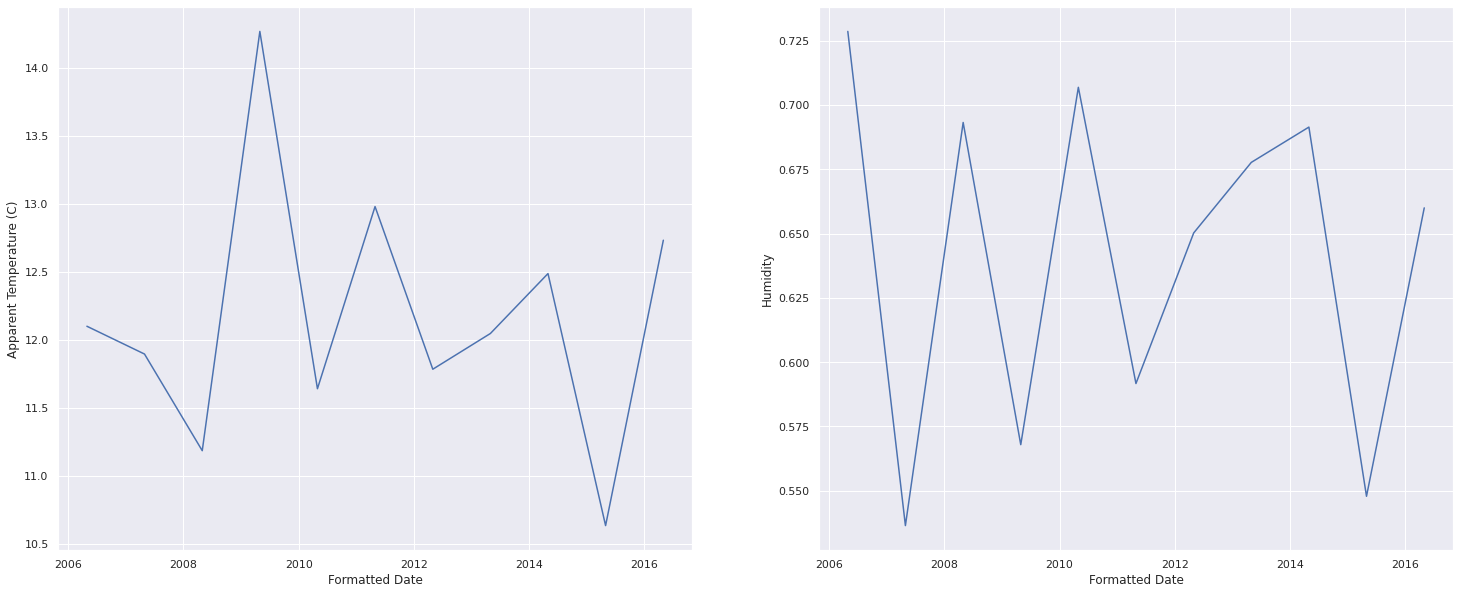

In [ ]:
sns.set_theme(style="darkgrid")
fig,axes=plt.subplots(1,2,squeeze=False,figsize=(25,10))
sns.lineplot(df_april.index,df_april['Apparent Temperature (C)'],ax=axes[0][0])
sns.lineplot(df_april.index,df_april['Humidity'],ax=axes[0][1])